In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pathlib
import time
import datetime
import os
import numpy as np
import random
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1177989684
import tensorflow as tf
from IPython import display

import model_fcts as mod
import preprocessing_fcts as pp

In [ ]:
cor_file = open('cor_list')
cors = cor_file.readlines()
int_cors=[]
for i in range(len(cors)):
    int_cors.append(int(cors[i].split(':')[1]))
int_cors

In [ ]:
len(int_cors)

In [ ]:
train_256 = tf.data.Dataset.load('tf_dataset/raw/train_dataset_rgb_256')
train_512 = tf.data.Dataset.load('tf_dataset/raw/train_dataset_rgb_512')

In [ ]:
for i in train_512.take(1):
    plt.imshow(i[0][:,:,0])

In [ ]:
def divide_image(image):
    return tf.convert_to_tensor([image[0:256,0:256], image[0:256,256:512], image[256:512,0:256], image[256:512,256:512]])

In [ ]:
dsm512 = train_512.map(lambda x,y:x)
dsm256 = train_256.map(lambda x,y:x)
dsm512 = dsm512.map(lambda x: divide_image(x))
dsm512 = dsm512.flat_map(tf.data.Dataset.from_tensor_slices)
ex_dsm = np.array([i for i in dsm512.take(1)][0])

In [ ]:
len(corr_list)

In [ ]:
def find_cor(ds, im, im_list):
    n = 0
    res = None
    for i in ds.as_numpy_iterator():
        if n not in im_list:
            if np.array_equal(i, im):
                res = n
        n += 1
    return res
 
corr_list = int_cors
k = 0
for dsm in dsm512.as_numpy_iterator():
    if k > len(corr_list) - 1:
        new_cor = find_cor(dsm256, dsm, corr_list)
        corr_list.append(new_cor)
        print(str(k) + ' : ' + str(new_cor))
    k += 1
    print(k, end='\r')

In [ ]:
for i in corr_list:
    print(i, end=', ')

In [ ]:
cor_file = open('cor_list', 'r')
corr_list = cor_file.read().split(',')
corr_list[0] = corr_list[0][1:]
corr_list[-1] = corr_list[-1][:-1]
for i in range(len(corr_list)):
    corr_list[i] = int(corr_list[i])
corr_list


In [ ]:
len(corr_list)

In [ ]:
n = 0
ex256 = [tf.cast(i[:,:,1:], dtype='int32') for i in dsm256.take(199)][198]
ex512 = [tf.cast(i[:,:,1:], dtype='int32') for i in dsm512.take(8708)][-11]
plt.figure(figsize=(3,3))
plt.imshow(ex256)
plt.figure(figsize=(3,3))
plt.imshow(ex512)

ex256 = [i[:,:,0] for i in dsm256.take(199)][198]
ex512 = [i[:,:,0] for i in dsm512.take(8708)][-11]
plt.figure(figsize=(3,3))
plt.imshow(ex256)
plt.figure(figsize=(3,3))
plt.imshow(ex512)

In [5]:
raw_test_datataset, test_dataset = pp.load_dataset(256, False)

In [6]:
list_im = []
for i in range(0,336,17):
    print(i)
    list_im.append(str(i))

0
17
34
51
68
85
102
119
136
153
170
187
204
221
238
255
272
289
306
323


In [7]:
list_im = [0,43,87,130,174,217,261,304] #epochs : 0,5,10,15,20,25,30,35

In [8]:
dtms = [i[0] for i in test_dataset.map(lambda x,y:y).take(3)]
dtms

[<tf.Tensor: shape=(256, 256, 1), dtype=float32, numpy=
 array([[[-0.7737425 ],
         [-0.77307284],
         [-0.77410555],
         ...,
         [-0.8043771 ],
         [-0.8065701 ],
         [-0.8088601 ]],
 
        [[-0.7733199 ],
         [-0.7737356 ],
         [-0.774397  ],
         ...,
         [-0.8017326 ],
         [-0.803848  ],
         [-0.80605567]],
 
        [[-0.773874  ],
         [-0.7736994 ],
         [-0.7741474 ],
         ...,
         [-0.799067  ],
         [-0.80110395],
         [-0.80322796]],
 
        ...,
 
        [[-0.93483675],
         [-0.9328063 ],
         [-0.9308134 ],
         ...,
         [-0.8188926 ],
         [-0.81903356],
         [-0.8191172 ]],
 
        [[-0.9350023 ],
         [-0.9328671 ],
         [-0.9307263 ],
         ...,
         [-0.82398057],
         [-0.82411987],
         [-0.8241876 ]],
 
        [[-0.9353641 ],
         [-0.93315685],
         [-0.9309315 ],
         ...,
         [-0.82908195],
         [-0.8

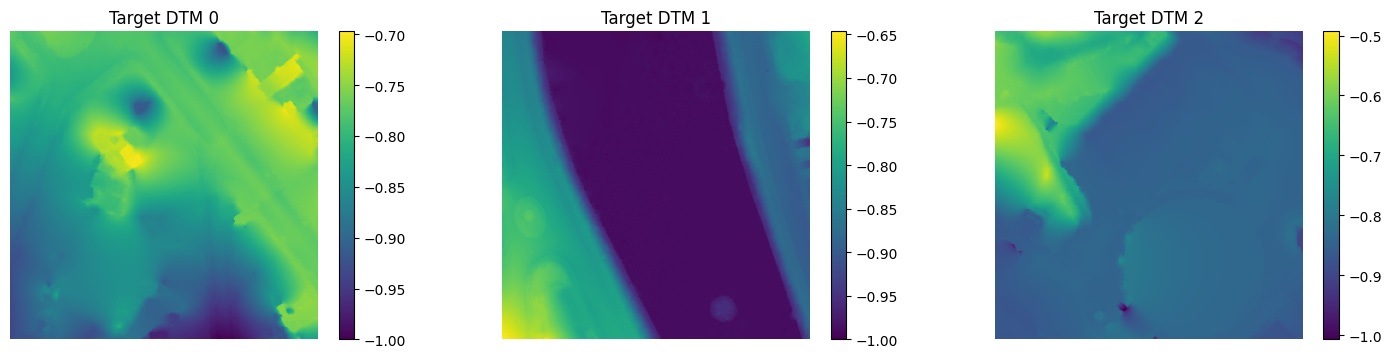

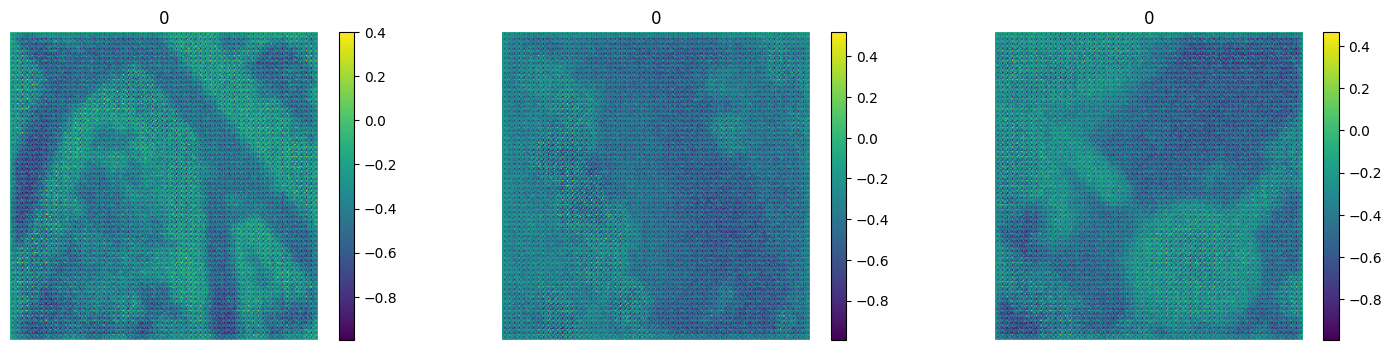

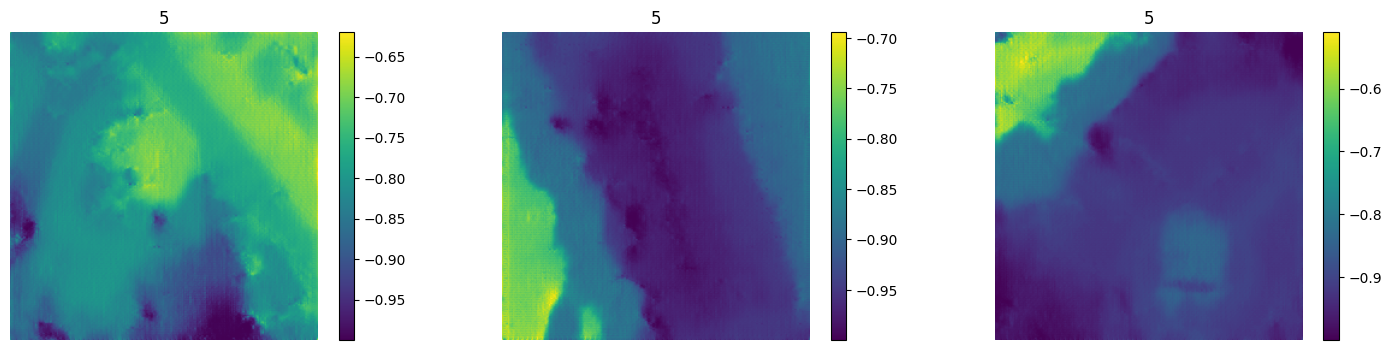

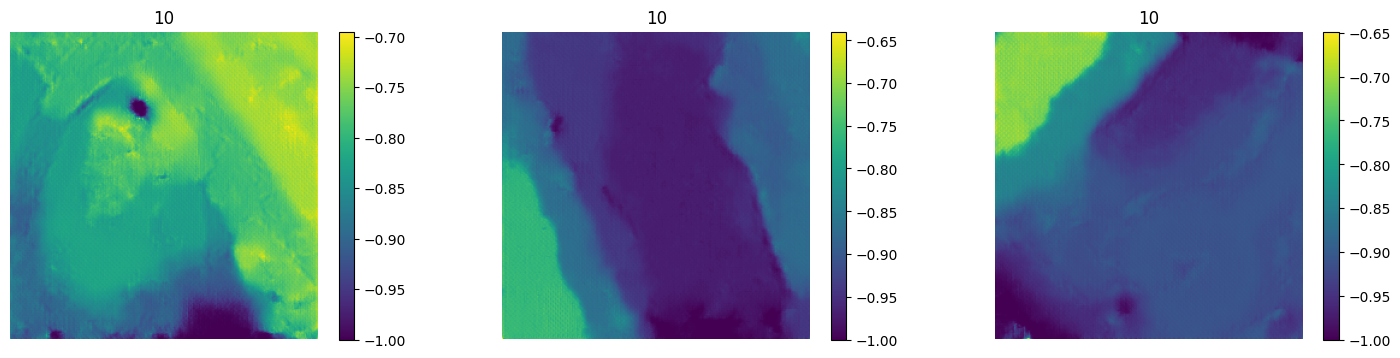

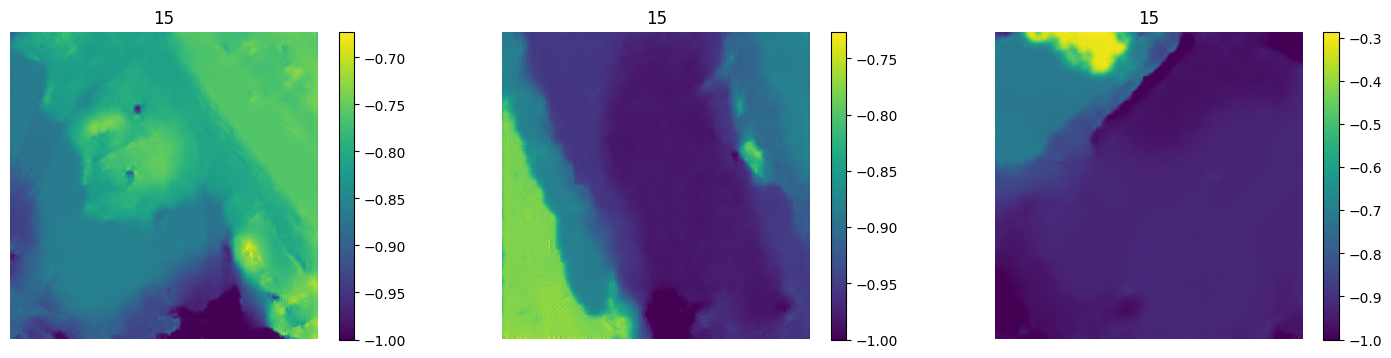

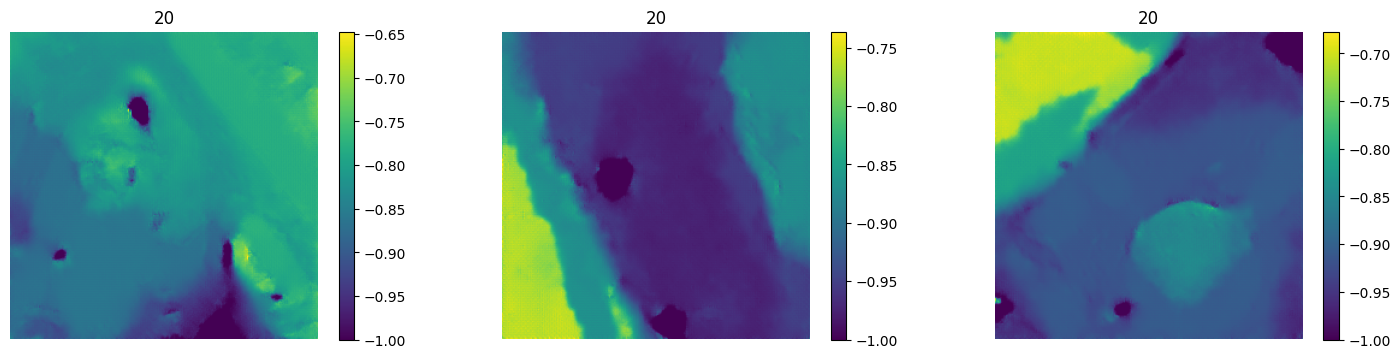

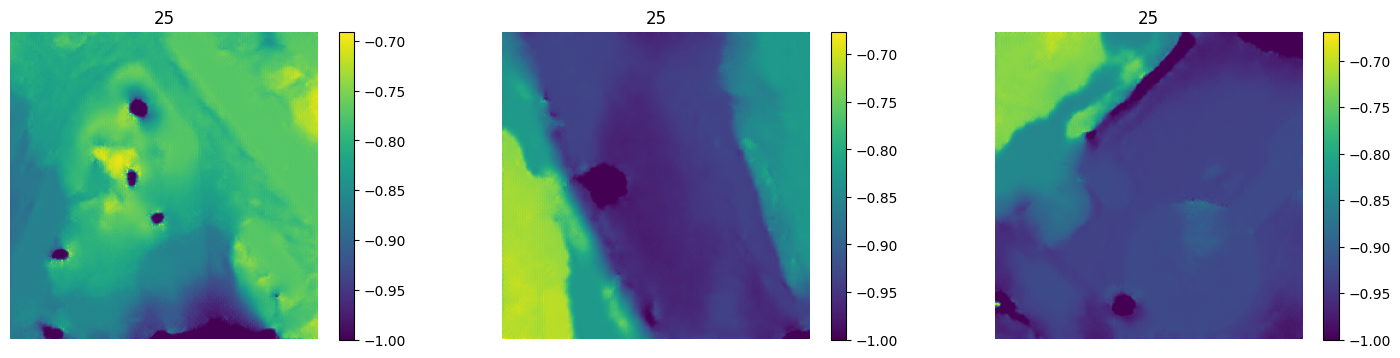

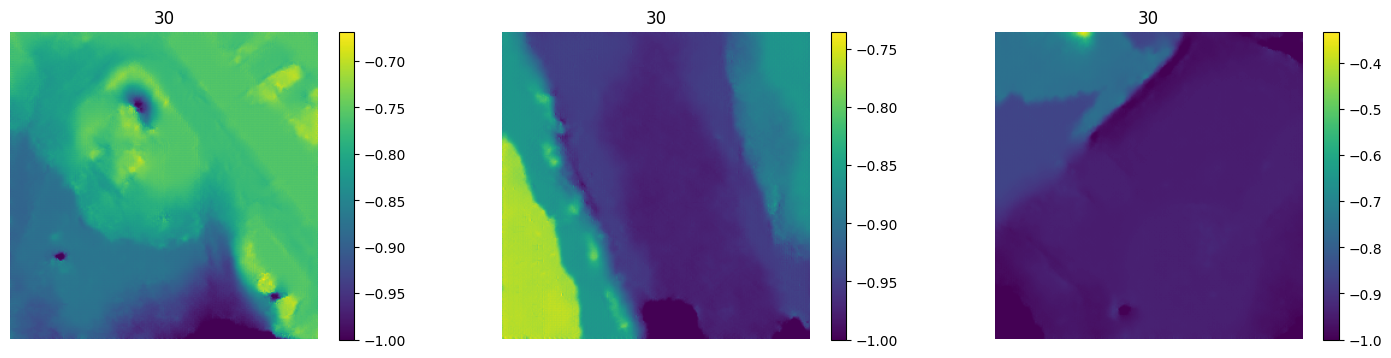

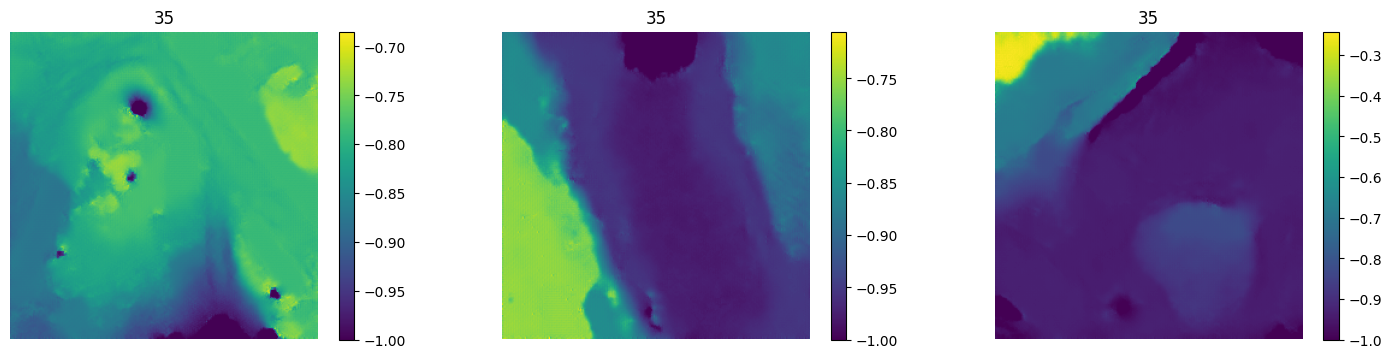

In [9]:
path = 'intermediate_images/rmse_drib/'

fig, axs = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(18)
for i in range(3):
    ax = axs[i]
    im = ax.imshow(dtms[i])
    ax.title.set_text('Target DTM ' + str(i))
    fig.set_figheight(4)
    cbar = fig.colorbar(im, ax=ax)
    ax.axis('off')

n = 0
for im_num in list_im:
    fig, axs = plt.subplots(1,3)
    fig.set_figheight(6)
    fig.set_figwidth(18)
    for i in range(3):     
        ax = axs[i]
        ax.title.set_text(str(n))
        path_im = path + str(im_num) + '_' + str(i+1) + '.npy'
        image = np.load(path_im)
        image = image
        im = ax.imshow(image[0])
        ax.axis('off')
        fig.set_figheight(4)
        cbar = fig.colorbar(im, ax=ax)
    n += 5



#example_list = [(inp, tar) for (inp, tar) in test_dataset.take(3)]
#plt.figure(figsize=(15,15))
#for i in range(3):
#    plt.subplot(1,3,i+1)
#    pred = generator(gen_example_list[i][0], training=True)
#    plt.imshow(pred[0])

    
#plt.figure(figsize = (15,15))
#for i in range(3):
#    plt.subplot(1,3,i+1)
#    plt.imshow(example_list[i][1][0])
    
#plt.figure(figsize=(15,15))
#for i in range(3):
#    plt.subplot(1,3,i+1)
    #pred = generator(, training=True)
#    plt.imshow(gen_example_list[i][0][0])

In [ ]:
path_im = path + str(23) + '_' + str(1) + '.npy'
image = np.load(path_im)
plt.imshow(image[0])
plt.savefig('grid_ep_3.png')

In [ ]:
image = (image +1) * 127.5
print(image)

In [ ]:
im = Image.fromarray(image[0][:,:,0])
im.convert('L').save('grid_ep_1.jpg')

In [ ]:
path = 'intermediate_images/naderi_batch_size_1/'
for im_num in list_im:
    plt.figure(figsize=(15,15))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(str(im_num))
        path_im = path + im_num + '_' + str(i+1) + '.npy'
        image = np.load(path_im)
        image = image
        plt.imshow(image[0])